In [48]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys



sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f


pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

In [49]:
df_encoded=pd.read_csv("../../datos/datos1/datos_nulos_minmax_encoded.csv", index_col=0).reset_index(drop=True)

In [50]:
df_encoded.head()

,price,bathrooms,province,municipality,district,size_MinMax,distance_MinMax,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,newDevelopment_False,newDevelopment_True,newDevelopment_desconocido,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido
0,750.00,680.23,693.41,705.59,687.21,0.31,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,750.00,680.23,693.41,687.37,685.64,0.39,0.27,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,400.00,650.45,693.41,639.59,601.63,0.36,0.92,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,450.00,680.23,593.40,646.09,601.63,0.53,0.79,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,450.00,680.23,593.40,650.54,601.63,0.31,0.64,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [51]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [52]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.8, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (modelo 4)

    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]

In [53]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [35,50,65,80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13,25,35,45,50],
    'max_depth': [6,7,8],
    'min_samples_split': [25,30,35],
    'min_samples_leaf': [6,7,8], 
    'max_leaf_nodes': [8,9,10]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=35, max_leaf_nodes=8,
                      min_samples_leaf=6, min_samples_split=25,
                      n_estimators=120, random_state=42)

In [54]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [55]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.74,30.36,"1,675.15",40.93
test,0.69,32.45,"1,809.40",42.54


PRUEBA de modelo con otros parametros



In [56]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13],
    'max_depth': [6,7,8],
    'min_samples_split': [25,30,35],
    'min_samples_leaf': [6,7,8], 
    'max_leaf_nodes': [8,9,10]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=8, max_features=13, max_leaf_nodes=9,
                      min_samples_leaf=6, min_samples_split=25, n_estimators=80,
                      random_state=42)

In [57]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [58]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.70,33.32,"1,948.95",44.15
test,0.64,35.67,"2,079.65",45.60


### De estos 2 modelos de Random Forest me quedo con el modelo 1 porque aunque cuenta con un poco más de over fitting (nada exagerado), creo que merece la pena por las mejoras tanto en mayor r cuadrado como en menores errores (Lo he probado con 0,7 y con 0,8 y me da el mejor resultado el 0,8)

In [61]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia

,Importancia
municipality,0.49
distance_MinMax,0.18
district,0.15
province,0.06
size_MinMax,0.05
rooms_1,0.01
floor_2,0.01
rooms_2,0.01
bathrooms,0.00
status_good,0.00


<Axes: xlabel='Importancia', ylabel='None'>

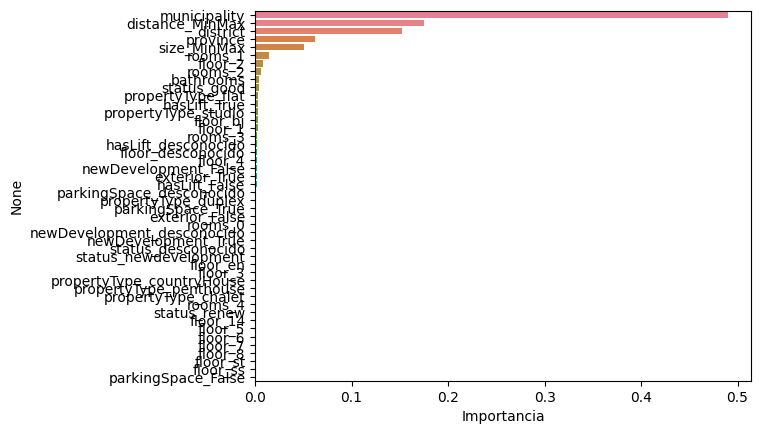

In [62]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo

### *XG BOOST*

    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]

In [63]:
from xgboost import XGBRegressor

In [64]:
modelo_xg= XGBRegressor(random_state=42, eval_metric= "rmse")
params_xg={    
    'n_estimators': [20,30,50,70,120, 150, 200],    #número de árboles que queremos que haga
    'learning_rate': [0.01,0.04,0.08, 0.1,0.15, 0.2],
    'max_depth': [6,8,10,12,15,20],
    'min_child_weight': [5,10,12,15,17],  #es como el min nsample leaf
    'subsample': [0.5,0.8, 1.0],
    'colsample_bytree': [0.2,0.5,0.8, 1.0]
}
random_search_xg= GridSearchCV(modelo_xg,
                               params_xg,
                               cv=3,
                               scoring= "neg_mean_squared_error",
                               n_jobs=-1 )

In [65]:
random_search_xg.fit(x_train,y_train["price"].values)   
modelo_final_xg= random_search_xg.best_estimator_
modelo_final_xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_test_xg=modelo_final_xg.predict(x_test)
y_pred_train_xg=modelo_final_xg.predict(x_train)

In [67]:
df_metricas_xg= f.metricas(y_train,y_pred_train_xg, y_test , y_pred_test_xg)
df_metricas_xg.T

,r2_score,MAE,MSE,RMSE
train,0.85,22.50,942.71,30.70
test,0.68,32.40,"1,830.29",42.78


In [68]:
df_importancia_xg=pd.DataFrame(modelo_final_xg.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia_xg

,Importancia
municipality,0.31
newDevelopment_False,0.05
district,0.04
rooms_1,0.04
size_MinMax,0.04
hasLift_True,0.04
province,0.04
status_desconocido,0.03
bathrooms,0.03
propertyType_penthouse,0.03


El modelo XGBoost lo descarto